<p align="center">
<FONT FACE="times new roman" SIZE=5>
<br>
<img src="https://www.usergioarboleda.edu.co/wp-content/uploads/ultimatum/imagens/logo-mobile-UniversidadSergioArboleda.png"
width="750" height="250">
</img>
<br>
<i><b>Docente:</b> Juan Pablo Ospina.</i>
<br>
<i><b>Asignatura:</b> Vida artificial</i>
<br>
<i><b>Estudiantes:</b> Chiara Valenzuela, Andrea Terraza y Miguel Thomas</i>
<br>
<i><b>Tema:</b>
Componentes de una serie de tiempo</i>
<br>
<i><b>Grupo:</b> Dracarys (A)</i>
<br>
<img src='https://i.pinimg.com/originals/ba/78/85/ba788588817b74ef4713383ceac3e0ef.gif'>
<br>
<i>23/08/24</i>
</FONT>
</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
plt.style.use('ggplot')

In [2]:
url = 'https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/EDA/minambiente2023.csv'

column_names = ['fecha', 'pm10', 'pm2-5', 'velo-viento', 'precipitacion', 'direccion', 'o3', 'co', 'no', 'no2', 'nox']
df = pd.read_csv(url, sep=';', names=column_names)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   fecha          8760 non-null   object
 1   pm10           8760 non-null   object
 2   pm2-5          8760 non-null   object
 3   velo-viento    8760 non-null   object
 4   precipitacion  8760 non-null   object
 5   direccion      8760 non-null   object
 6   o3             8760 non-null   object
 7   co             8760 non-null   object
 8   no             8760 non-null   object
 9   no2            8760 non-null   object
 10  nox            8760 non-null   object
dtypes: object(11)
memory usage: 752.9+ KB


In [4]:
df['fecha'] = df['fecha'].str.replace('24:00', '23:59')
df['fecha'] = pd.to_datetime(df['fecha'], dayfirst=True)
df.set_index('fecha', inplace=True)

## ¿Qué estrategia utilizaría para remplazar los valores faltantes?

In [5]:
cols_to_convert = ['pm10', 'pm2-5', 'velo-viento', 'precipitacion', 'o3', 'co', 'no', 'no2', 'nox']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col].str.replace(',', '').str.strip(), errors='coerce')

In [6]:
df['pm2-5_MA'] = df['pm2-5'].rolling(window=24, min_periods=1).mean()
df['pm2-5'].fillna(df['pm2-5_MA'], inplace=True)
df.drop(columns=['pm2-5_MA'], inplace=True)

In [7]:
df['pm2-5'] = df['pm2-5'].interpolate(method='linear')

Incluso luego de reemplazar los valores faltantes con la media móvil, existían algunos que seguían como valores nulos, por lo que se decidió usar el método de interpolación lineal para llenar los valores faltantes. Esto calcula los valores intermedios basándose en los datos circundantes.

## ¿Se observa comportamiento estacional, cíclico y tendencia?

In [8]:
result = seasonal_decompose(df['pm2-5'], model='additive', period=24*7)

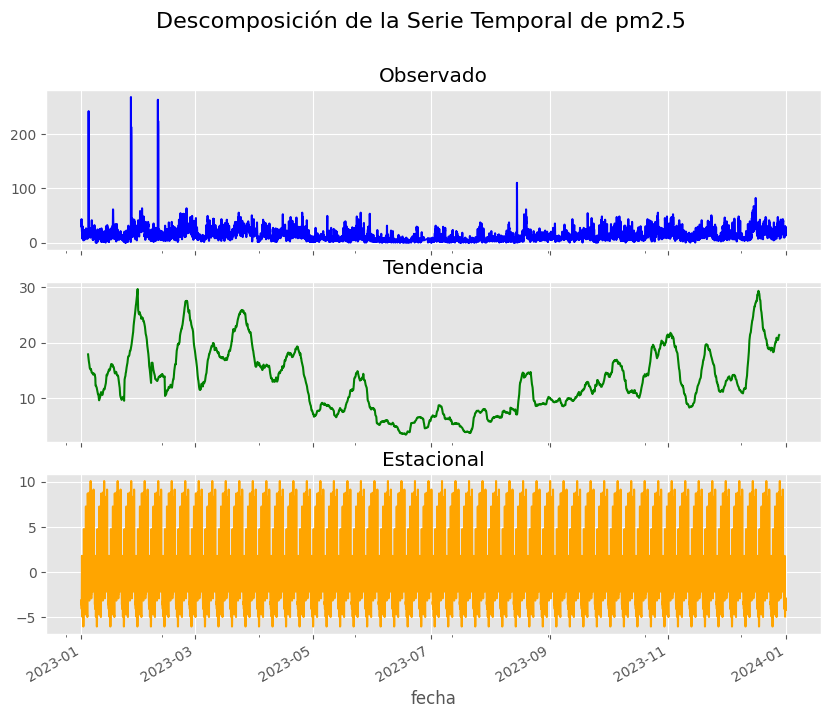

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

result.observed.plot(ax=ax1, title='Observado', color='blue')
result.trend.plot(ax=ax2, title='Tendencia', color='green')
result.seasonal.plot(ax=ax3, title='Estacional', color='orange')

plt.suptitle('Descomposición de la Serie Temporal de pm2.5', fontsize=16)
plt.show()

- **Estacionalidad (Seasonal)**: La estacionalidad parece ser muy regular, con ciclos claros que se repiten. Este comportamiento estacional podría estar relacionado con patrones de tráfico, actividad industrial, o condiciones meteorológicas que son consistentes día a día y semana a semana.

- **Cíclica:** No se observan patrones cíclicos claros, ya que los ciclos implicarían fluctuaciones de duración variable que no tienen una periodicidad fija. Si bien hay fluctuaciones a largo plazo observadas en la tendencia, estas no muestran un ciclo bien definido, sino que son más indicativas de variaciones en la tendencia a lo largo del tiempo.

- **Tendencia (Trend)**: La tendencia parece indicar fluctuaciones moderadas a lo largo del año, con una tendencia general que podría estar ligeramente en aumento hacia finales del periodo. Esto podría sugerir que hay ciertos periodos donde las condiciones ambientales o actividades humanas conducen a un aumento en los niveles de PM2.5.

## Realice un gráfico estacional con periodos semanal y diario. ¿Qué conclusiones podemos obtener?

In [10]:
df['day_of_week'] = df.index.dayofweek
df['hour_of_day'] = df.index.hour

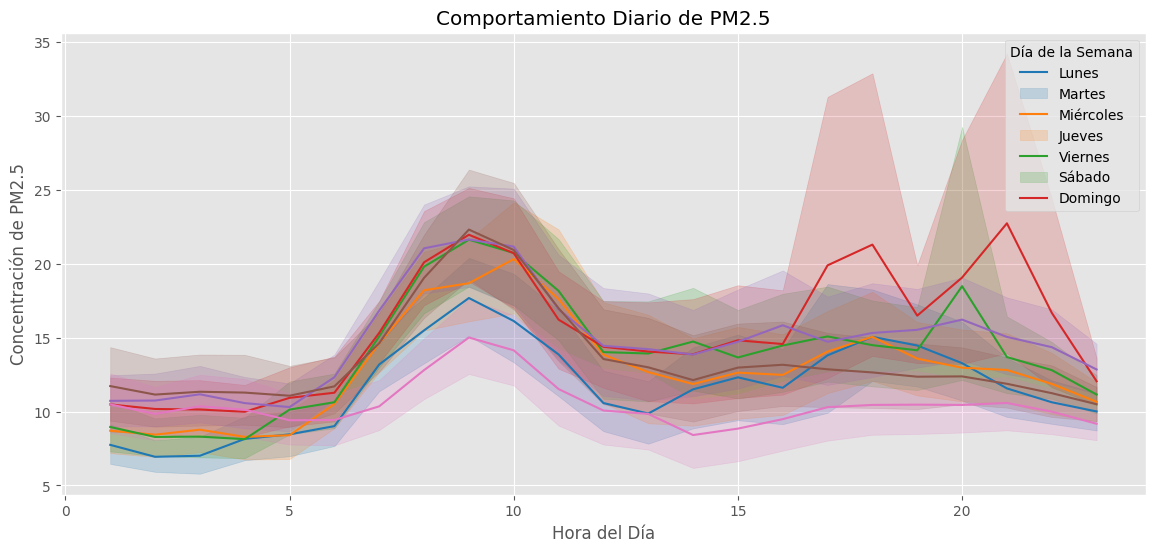

In [11]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='hour_of_day', y='pm2-5', hue='day_of_week', palette='tab10')
plt.title('Comportamiento Diario de PM2.5')
plt.xlabel('Hora del Día')
plt.ylabel('Concentración de PM2.5')
plt.legend(title='Día de la Semana', labels=["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"])
plt.show()


- **Pico Matutino:** Hay un aumento significativo en la concentración de PM2.5 durante las primeras horas de la mañana, entre las 5:00 y las 10:00 horas. Este comportamiento es asociado con el tráfico vehicular matutino, donde la actividad aumenta considerablemente a medida que las personas se desplazan al trabajo o la escuela.

- **Pico Vespertino:** Se observa un segundo pico significativo entre las 18:00 y las 20:00 horas, que también puede estar relacionado con el tráfico vehicular durante las horas pico de la tarde.

- **Días Laborales vs. Fin de Semana:** Los picos son más pronunciados los días laborables (especialmente el lunes y viernes), mientras que durante el fin de semana (sábado y domingo) hay una tendencia a tener concentraciones más bajas, aunque aún se observan algunos picos.

- Durante las horas de la madrugada (0:00 a 5:00), las concentraciones de PM2.5 son relativamente bajas y estables, lo cual es consistente con la menor actividad humana y vehicular en estas horas.

<ipython-input-12-2146348d3d41>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x='day_of_week', y='pm2-5', palette='tab10')


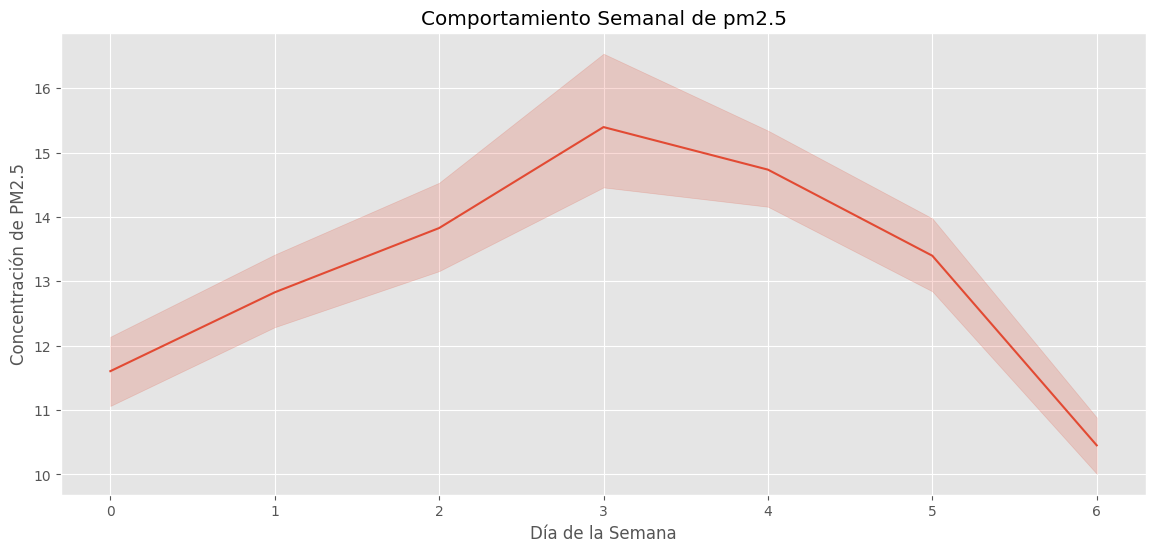

In [12]:
# Gráfico estacional semanal
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='day_of_week', y='pm2-5', palette='tab10')
plt.title('Comportamiento Semanal de pm2.5')
plt.xlabel('Día de la Semana')
plt.ylabel('Concentración de PM2.5')
plt.show()

 - **Lunes a Miércoles:** Se observa un aumento constante en la concentración de PM2.5 desde el inicio de la semana (día 0, lunes) hasta aproximadamente el miércoles (día 3), donde tiene un pico. Este comportamiento es típico, ya que la actividad humana tiende a intensificarse a medida que avanza la semana laboral, lo que genera mayores emisiones de contaminantes.

- **Jueves a Domingo:** A partir del miércoles, la concentración de PM2.5 comienza a disminuir progresivamente hasta llegar al mínimo el domingo (día 6). Esta tendencia refleja la disminución de la actividad industrial y vehicular durante el fin de semana, lo que resulta en una menor generación de partículas contaminantes.

## Realice el gráfico “subseries()” y analice los resultados obtenidos.

In [15]:
df['day_of_week'] = df.index.day_name()
days_of_week = df['day_of_week'].unique()

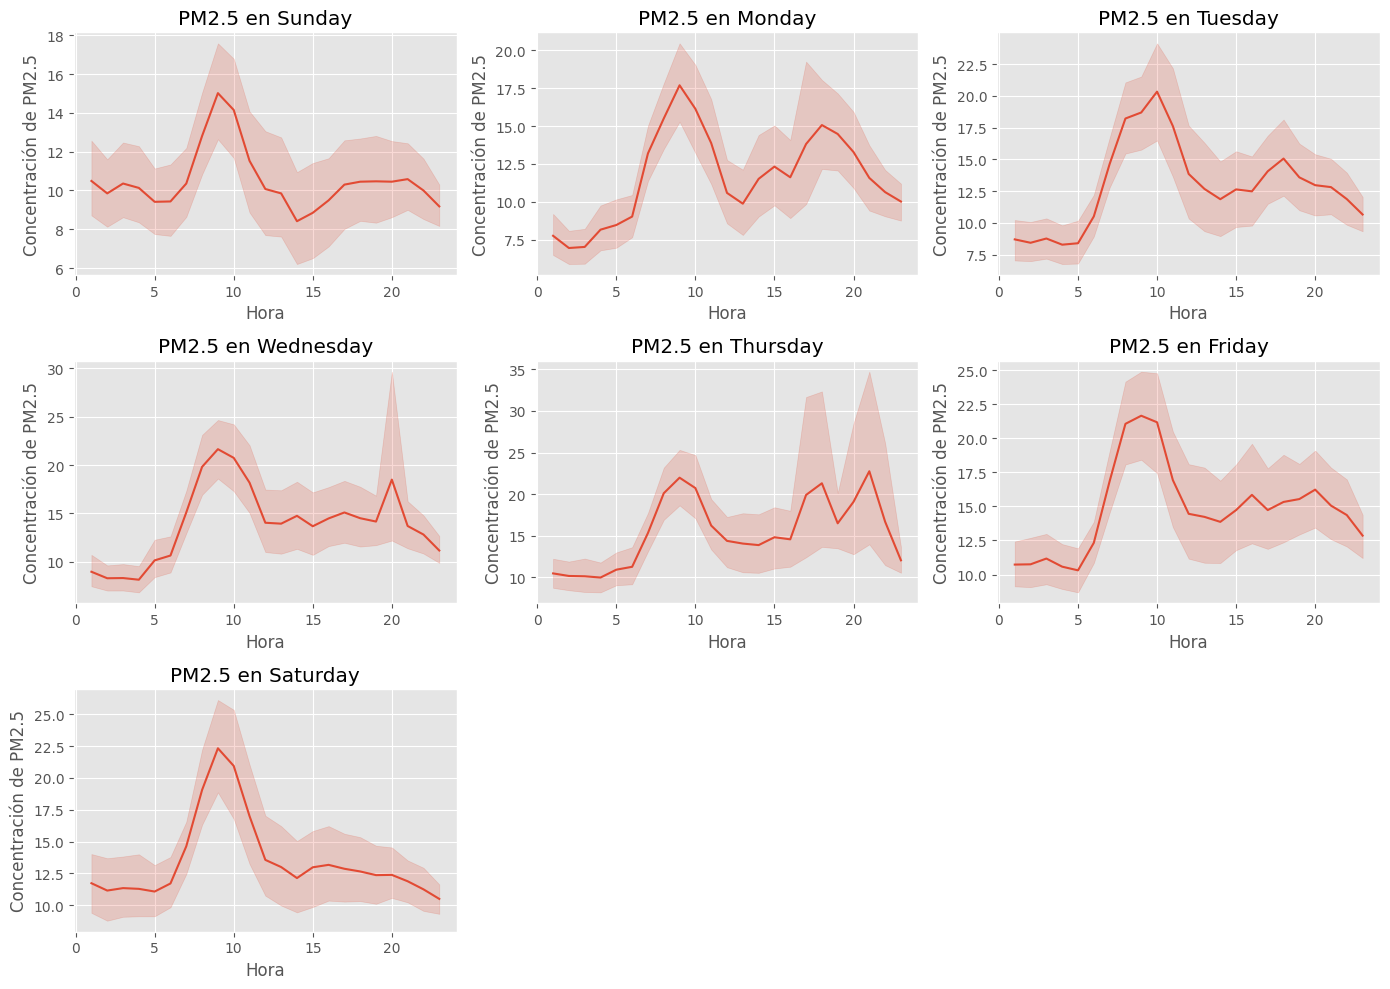

In [16]:
plt.figure(figsize=(14, 10))
for i, day in enumerate(days_of_week):
    plt.subplot(3, 3, i + 1)
    subset = df[df['day_of_week'] == day]
    sns.lineplot(data=subset, x=subset.index.hour, y='pm2-5')
    plt.title(f'PM2.5 en {day}')
    plt.xlabel('Hora')
    plt.ylabel('Concentración de PM2.5')

plt.tight_layout()
plt.show()

- **Variabilidad Diaria**: Los gráficos muestran la concentración de PM2.5 a lo largo del día para cada día de la semana. Se observa que hay picos de concentración en diferentes momentos del día, lo que indica una clara variabilidad en la contaminación del aire dentro de un mismo día.

- **Picos Matutinos y Vespertinos**: En la mayoría de los días, se observa un pico de concentración de PM2.5 en las horas de la mañana (alrededor de las 7-10 AM) y otro pico en la tarde o noche (alrededor de las 7-9 PM). Esto podría estar relacionado con actividades humanas como el tráfico vehicular o la industria, que tienden a ser más intensas en estas horas.

- **Diferencias entre Días**: Aunque hay un patrón general, existen diferencias entre los días. Por ejemplo, el miércoles y el jueves muestran picos más pronunciados por la noche, mientras que el domingo tiene un comportamiento más suave y menos variable. Esto sugiere que las actividades que influyen en los niveles de PM2.5 varían no solo a lo largo del día, sino también entre los diferentes días de la semana.